In [90]:
from itertools import izip
import csv, json
import pandas as pd
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
from collections import defaultdict
#make sure plots are embedded into the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [91]:
ny_tri = pd.read_csv('data/toxic-release-inventory.ny.2013.geoid.csv')

In [92]:
ny_tri_trim = ny_tri[['tri_facility_id','facility_name','county','n_5_2_stack_air', 'chemical', 'latitude', 'longitude']]
ny_tri_trim = ny_tri_trim[ny_tri_trim['facility_name']!='NATIONAL GRID WADING RIVER IC FACILITY']

In [93]:
ny_group = ny_tri_trim.groupby(['facility_name', 'chemical'], as_index=False).aggregate(np.sum)
ny_group.head()

,facility_name,chemical,n_5_2_stack_air,latitude,longitude
0,3M CO - TONAWANDA,CARBON DISULFIDE,355000,42.975756,-78.918270
1,3M CO - TONAWANDA,DIISOCYANATES,16,42.975756,-78.918270
2,ABBOTT INDUSTRIES INC,TETRACHLOROETHYLENE,6800,40.699011,-73.803894
3,ABSOLUTE COATINGS INC,"1,2,4-TRIMETHYLBENZENE",0,40.927500,-73.771800
4,ABSOLUTE COATINGS INC,N-METHYL-2-PYRROLIDONE,0,40.927500,-73.771800


In [94]:
chemicals_pivot = ny_group.pivot(index='facility_name', columns='chemical', values='n_5_2_stack_air')
chemicals_pivot.head()

chemical,"1,1,1-TRICHLOROETHANE","1,1,2,2-TETRACHLOROETHANE","1,2,4-TRIMETHYLBENZENE","1,2-DIBROMOETHANE","1,2-DICHLOROETHANE","1,2-DICHLOROETHYLENE","1,2-DICHLOROPROPANE","1,4-DICHLOROBENZENE","2,4-DIMETHYLPHENOL",2-MERCAPTOBENZOTHIAZOLE,...,TOLUENE DIISOCYANATE (MIXED ISOMERS),"TOLUENE-2,4-DIISOCYANATE",TRICHLOROETHYLENE,TRIETHYLAMINE,VANADIUM COMPOUNDS,VINYL ACETATE,VINYL FLUORIDE,XYLENE (MIXED ISOMERS),ZINC (FUME OR DUST),ZINC COMPOUNDS
facility_name,,,,,,,,,,,,,,,,,,,,,
3M CO - TONAWANDA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABBOTT INDUSTRIES INC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABSOLUTE COATINGS INC,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
ADCHEM CORP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,222,NaN,NaN,NaN,NaN
ADM MILLING CO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
latLon = ny_tri_trim[['facility_name', 'longitude', 'latitude']].set_index('facility_name').drop_duplicates()

In [96]:
for i in latLon.index:
    print i, latLon.longitude[i],latLon.latitude[i]

METAULLICS SYSTEMS A DIV OF PYROTEK-INC -78.94039 43.13083
BP PRODUCTS NA INC BROOKLYN TERMINAL -73.938198 40.728109
GENERAL ELECTRIC CO CPQP -73.589193 43.285655
SKF AEROENGINE JAMESTOWN -79.22745 42.09882
FMC CORP  MIDDLEPORT PLANT -78.468875 43.207167
STRATHMORE PRODUCTS INC -76.195092 43.118623
VETTE TECHNOLOGY LLC -77.36418 43.23204
SILGAN CONTAINERS MANUFACTURING CORP -76.967038 43.055057
LEHIGH NORTHEAST CEMENT CO - GLENS FALLS PLANT -73.6195 43.3086
NOCO ENERGY CORP -78.925194 42.991128
GARELICK FARMS OF NEW YORK -73.70933 42.64417
CURTIS SCREW CO LLC -78.8029 42.88278
MANTH BROWNELL INC -75.92049 43.09508
NORTHEAST TREATERS OF NEW YORK  LLC -73.839693 42.28652
NATIONAL GRID  NORTHPORT POWER STATION -73.342561 40.923488
CENTRAL ASPHALT -76.861 42.371
REMET PIC INC -75.18433 43.09052
SAFETY-KLEEN SYSTEMS INC BUFFALO OIL RECOVERY FACILITY -78.85899 42.85931
STEUBEN FOODS INC -78.621384 42.800923
DOLOMITE PRODUCTS INCWALWORTH FACILITY -77.317 43.165
ULTRA DAIRY LLC -76.055 43.083


In [97]:
IntPos={}
for c in latLon.index:
    IntPos[c]=(latLon.longitude[c],latLon.latitude[c])

In [98]:
fac = defaultdict(list)
for i in chemicals_pivot.index:
    for j in chemicals_pivot:
        if chemicals_pivot[j][i] > 0:
#             print chemicals_pivot[j][i], i, j
            fac[i].append(j)

In [99]:
print len(fac)

377


In [100]:
# for i in fac:
#     print i, fac[i]

In [101]:
common = defaultdict(list)
for i in fac:
    for j in fac:
        if i < j:
            for x in fac[i]:
                for y in fac[j]:
                    if x == y:
                        common[(i,j)].append(x)

In [102]:
len(common)

11283

In [103]:
for i in common:
    print i, common[i], len(common[i])

('EASTERN ALLOYS INC', 'PARKER HANNIFIN CORP FLUID SYSTEMS DIV') ['LEAD'] 1
('JEFFERSON ROAD OPERATIONS CENTER', 'MEDI-RAY INC') ['LEAD'] 1
('DERRICK CORP', 'SILGAN CONTAINERS MANUFACTURING CORP') ['CERTAIN GLYCOL ETHERS'] 1
('GM COMPONENTS HOLDINGS LLC', 'U S CHROME CORP OF NE W YORK') ['LEAD'] 1
('GRIFFITH ENERGY - WAYLAND', 'NATIONAL GRID  NORTHPORT POWER STATION') ['POLYCYCLIC AROMATIC COMPOUNDS'] 1
('POLYSET CO INC', 'WYETH') ['DICHLOROMETHANE'] 1
('CASTLE OIL PORT MORRIS INC', 'MANITOU CONCRETE- DOLOMITE PRODUCTS CO') ['LEAD'] 1
('NOCO ENERGY CORP', 'SILGAN CONTAINERS MANUFACTURING CORP') ['1,2,4-TRIMETHYLBENZENE', 'XYLENE (MIXED ISOMERS)'] 2
('CAYUGA OPERATING CO LLC', 'CYTEC OLEAN INC') ['MERCURY COMPOUNDS'] 1
('BUCKEYE TERMINALS LLC - RENSSELAER TERMINAL', 'GLOBAL COS LLC NORTH TERMINAL') ['1,2,4-TRIMETHYLBENZENE', 'BENZENE', 'ETHYLBENZENE', 'N-HEXANE', 'NAPHTHALENE', 'POLYCYCLIC AROMATIC COMPOUNDS', 'TOLUENE', 'XYLENE (MIXED ISOMERS)'] 8
('DOLOMITE PRODUCTS INCWALWORTH FACILI

In [104]:
G = nx.Graph()

In [105]:
for e in common:
    G.add_edge(e[0],e[1],weight=len(common[e]))

In [106]:
len(G)

370

NetworkXError: Node 'EMAGIN CORP' has no position.

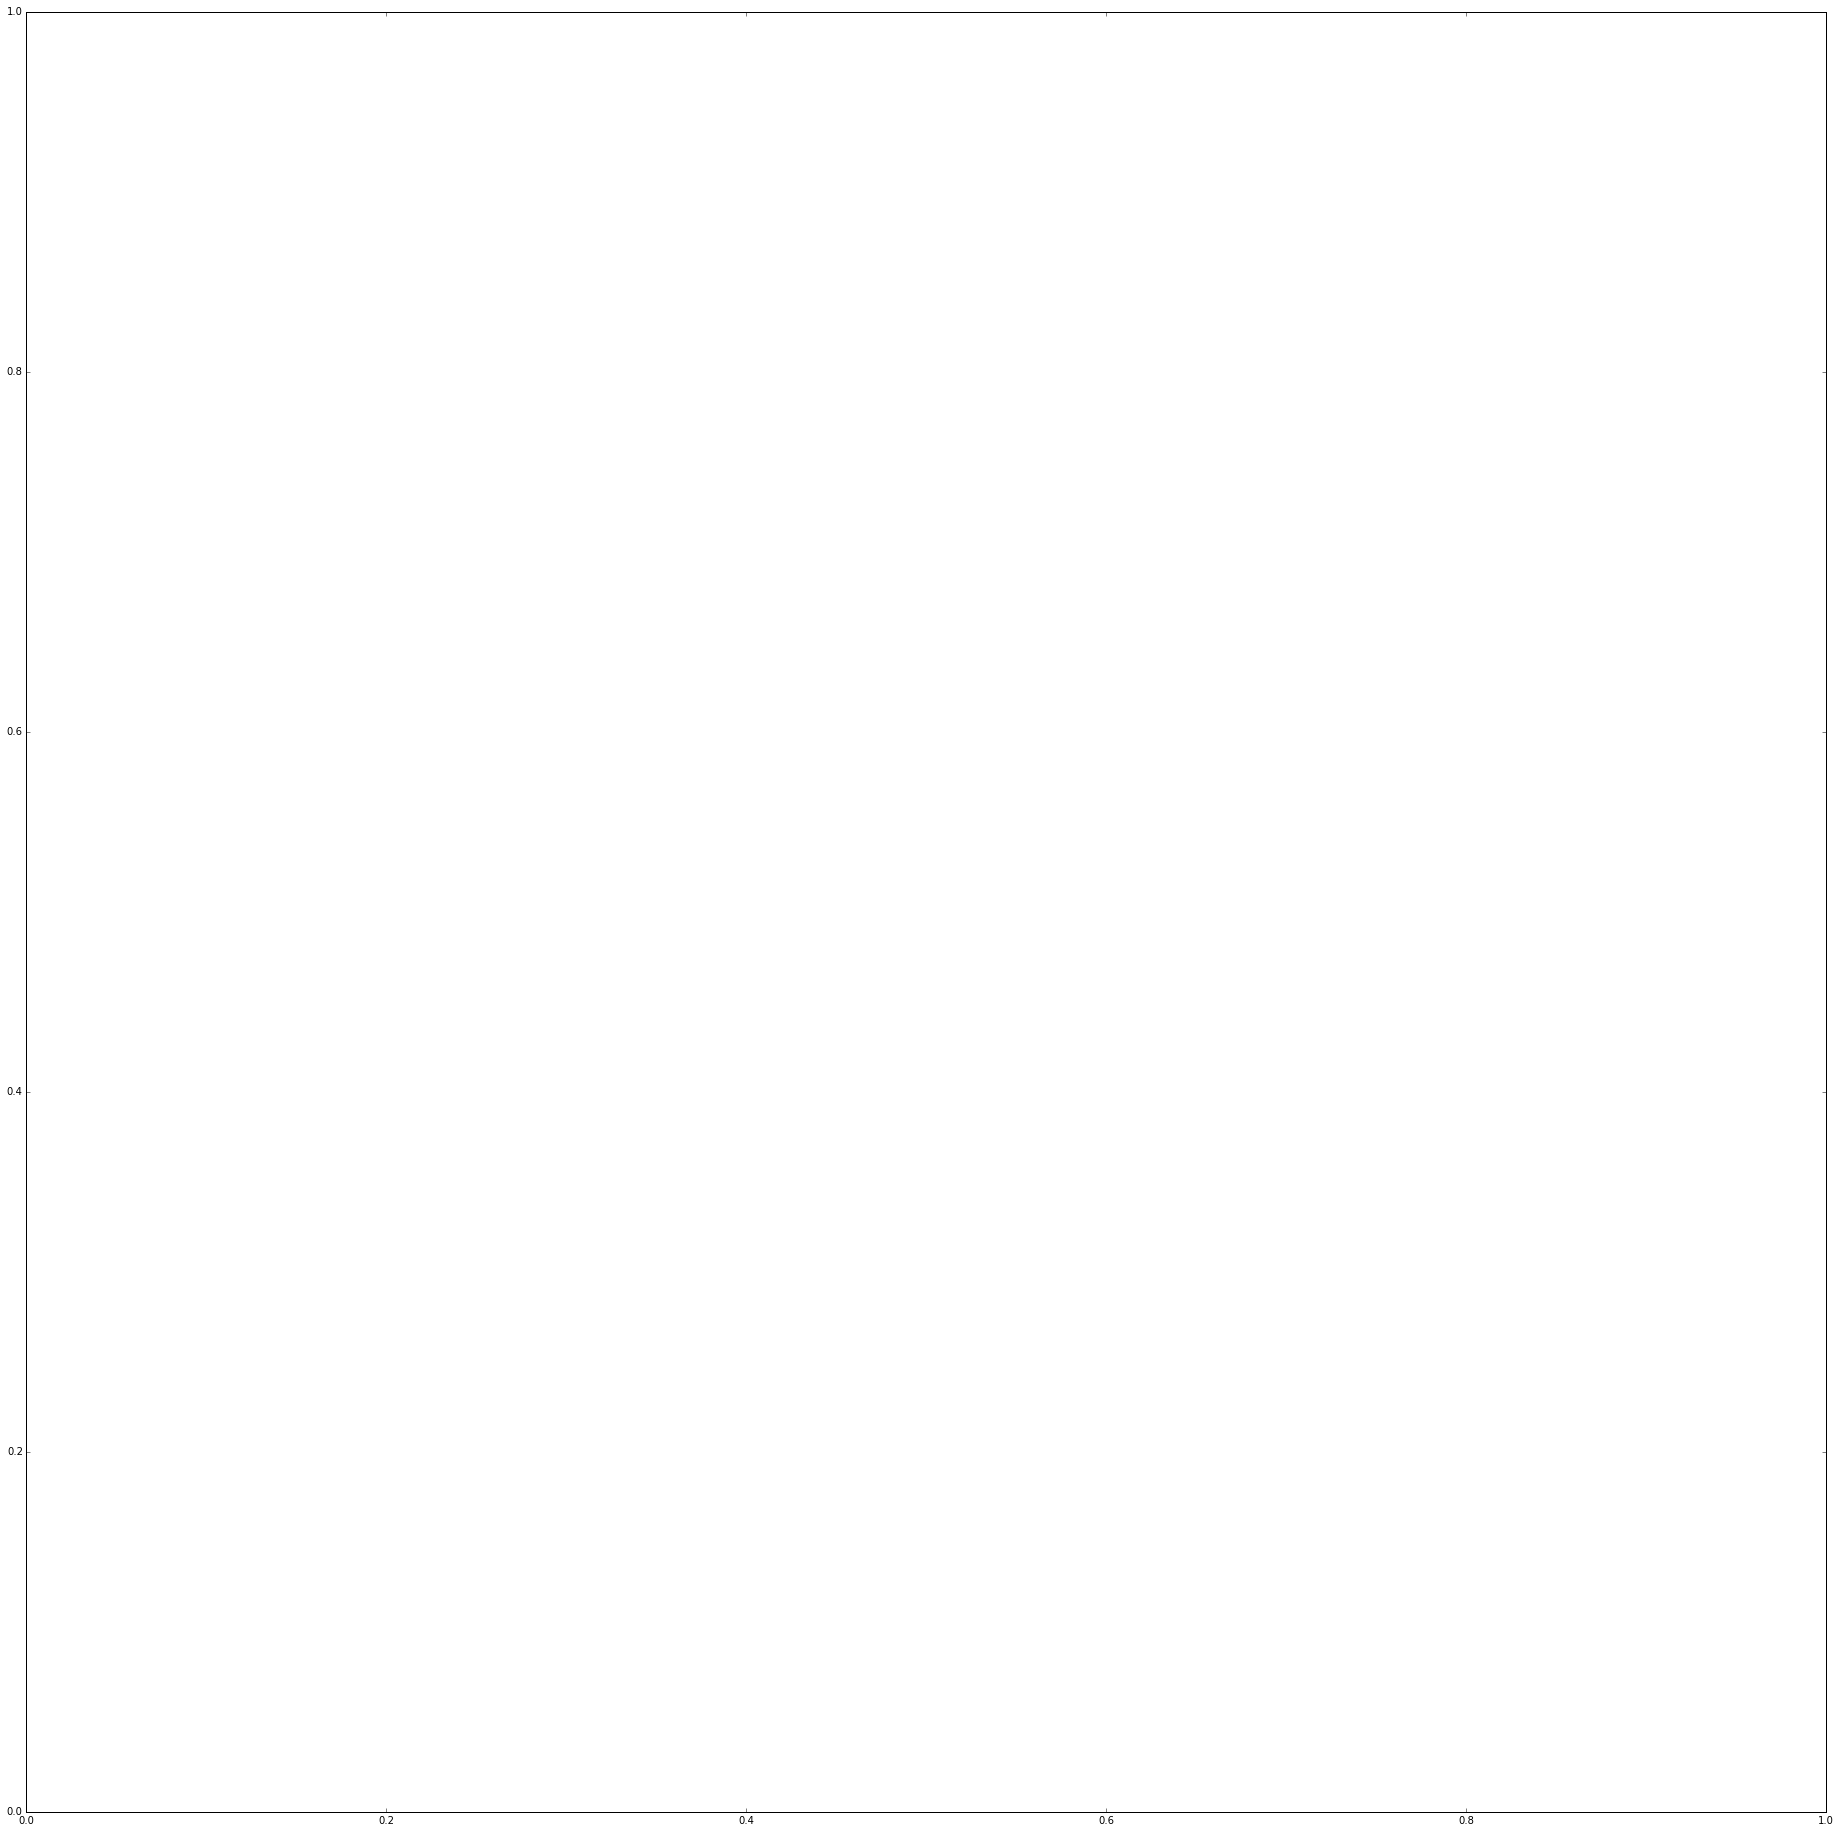

In [107]:
plt.figure(figsize = (25,25))
# np.random.seed(2015) #fix the origin of random generator - see below why
#now let's visualize, which turns out to be fairly simple with networkx
# nx.draw(G,node_size=20*np.array(G.degree().values()),width=w,with_labels=False)
nx.draw(G, pos=IntPos)

In [73]:
IntPos['EMAGIN CORP']

KeyError: 'EMAGIN CORP'

In [108]:
for i in G.node:
    print i, IntPos[i]

ROCHESTER STEEL TREATING WORKS  INC (-77.586590000000001, 43.161570000000005)
GLOBAL COS LLC CARGO TERMINAL (-74.014206000000001, 41.475020000000001)
AMERICAN ACRYLIC CORP (-73.337330000000009, 40.719159999999995)
SUNOCO FULTON ETHANOL PLANT (-76.373450000000005, 43.298029999999997)
INTERNATIONAL PAPER (-73.399275000000003, 43.891973)
US DOE BROOKHAVEN NATIONAL LABORATORY (-72.869579999999999, 40.859999999999999)
RENOLD INC (-79.575839999999999, 42.333999999999996)
SAES SMART MATERIALS INC (-75.338622999999998, 43.078031000000003)
PSEG POWER NY LLC BETHLEHEM ENERGY CENTER (-73.761111, 42.59375)
CARGILL INC SALT DIV (-76.864082999999994, 42.383322)
NATIONAL GRID EF BARRETT POWER STATION (-73.649000000000001, 40.617249999999999)
GILLINDER BROTHERS INC (-74.705119999999994, 41.383429999999997)
DU PONT NIAGARA FALLS PLANT (-79.030667000000008, 43.082971999999998)
FIBERMARK NA INC (FIBERMARK NA INC   -75.487588
FIBERMARK NA INC   -75.981500
Name: longitude, dtype: float64, FIBERMARK NA INC 

KeyError: 'EMAGIN CORP'